<a href="https://colab.research.google.com/github/pgideon1/Logistic-regressio0n/blob/main/Logistic_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/techis-ds-wiki-main/DS/Step 2-2 Classification Algos/01_Logistic-Regression/Log_reg_project/portu_banking_final.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


# Data InSights

In [ ]:
df = data.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [ ]:
df.describe()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,963.568005,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,259.279249,2.770014,211.772296,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,4918.000000,56.000000,9999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


### Checking the data count to understand whether it is balanced or not



In [ ]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


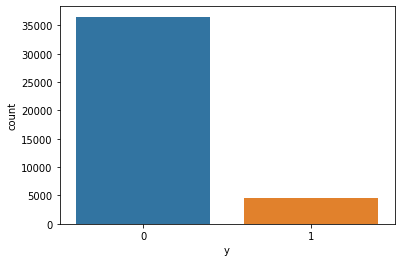

In [ ]:
sns.countplot(df['y'])

# Data Cleaning

In [ ]:
df.dtypes

age                object
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [ ]:
df['age'].unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '35-30', '25', '57', '63', '58', '60', '30-35', '64', '51',
       '23', '20', '74', '80', '61', '25-30', '62', '75', '21', '82',
       '77', '18-25', '30-32', '70', '50-55', '76', '73', '66', '22',
       '71', '19', '79', '88', '65', '67', '81', '18', '84', '69', '98',
       '85', '83', '78', '92', '45-50', '20-25', '20-40', '35-40', '86',
       '94', '17', '91', '89', '87', '95', '30-40', 56, 39, 30, 53, 37,
       22, 45, 31, 24, 50, 58, 33, 27, 28, 32, 51, 41, 49, 43, 44, 35, 29,
       26, 57, 25, 42, 48, 46, 67, 38, 34, 54, 40, 23, 47, 62, 75, 55, 36,
       52, 59, 78, 70, 60, 20, 66, 61, 21, 88, 18, 68, 71, 73, 80, 79, 63,
       76, 83, 65, 19, 86, 17, 72, 69, 81, 64, 77, 74, 85, 82],
      dtype=object)

In [ ]:
df = df.replace(to_replace=['35-30','30-35','25-30','18-25','30-32','50-55','45-50','20-25','20-40','35-40','30-40'], value=['33','33','27','22','30','52','48','23','30','37','35'])

In [ ]:
# Converting Age Columns into integer
df['age'] = pd.to_numeric(df['age'])

In [ ]:
df['job'].value_counts()

admin.           10420
blue-collar       9253
technician        6742
services          3966
management        2923
retired           1717
entrepreneur      1456
self-employed     1421
housemaid         1059
unemployed        1014
student            873
unknown            329
RETIRED              3
SERVICES             3
STUDENT              2
ADMIN.               2
MANAGEMENT           1
TECHNICIAN           1
BLUE-COLLAR          1
HOUSEMAID            1
UNKNOWN              1
Name: job, dtype: int64

In [ ]:
df = df.replace(to_replace=['ADMIN.','RETIRED','SERVICES','STUDENT','MANAGEMENT','TECHNICIAN','BLUE-COLLAR','HOUSEMAID','UNKNOWN'],value=['admin.','retired','services','student','management','technician','blue-collar','housemaid','unknown'])

In [ ]:
df['marital'].value_counts()

married     24923
single      11565
divorced     4608
unknown        80
M               5
D               4
S               3
Name: marital, dtype: int64

In [ ]:
df.replace(to_replace=["M","D","S"],value=["married","divorced","single"],inplace=True)

In [ ]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6035
professional.course     5243
basic.4y                4164
basic.6y                2286
unknown                 1731
illiterate                18
basic-4y                  12
basic-9y                  10
basic-6y                   6
Name: education, dtype: int64

In [ ]:
df.replace(to_replace=["basic-4y","basic-9y","basic-6y"],value=["basic.4y","basic.9y","basic.6y"],inplace=True)

In [ ]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [ ]:
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [ ]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [ ]:
df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [ ]:
df['month'].value_counts() 

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [ ]:
df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [ ]:
df['duration'].value_counts()

90      170
85      170
136     168
73      167
124     164
       ... 
1788      1
3422      1
1488      1
1306      1
1490      1
Name: duration, Length: 1544, dtype: int64

In [ ]:
df['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
25        8
26        8
31        7
30        7
35        5
33        4
32        4
34        3
42        2
43        2
40        2
39        1
41        1
56        1
37        1
Name: campaign, dtype: int64

In [ ]:
df['pdays'].value_counts()

999.0     39668
3.0         439
6.0         412
4.0         118
9.0          64
2.0          61
7.0          60
12.0         58
10.0         52
5.0          46
13.0         36
11.0         28
1.0          26
15.0         24
14.0         20
8.0          18
0.0          15
16.0         11
17.0          8
18.0          7
9999.0        5
19.0          3
22.0          3
21.0          2
26.0          1
20.0          1
25.0          1
27.0          1
Name: pdays, dtype: int64

In [ ]:
df['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [ ]:
df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [ ]:
df['euribor3m']= pd.to_numeric(df['euribor3m'])

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [ ]:
cat = df.select_dtypes(include='object')

In [ ]:
cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri,success


#### Imp Columns: 

In [ ]:
for i in cat.columns:
  print(i , "Has Unique value of: ",df[i].nunique())

job Has Unique value of:  12
marital Has Unique value of:  4
education Has Unique value of:  8
default Has Unique value of:  3
housing Has Unique value of:  3
loan Has Unique value of:  3
contact Has Unique value of:  2
month Has Unique value of:  10
day_of_week Has Unique value of:  5
poutcome Has Unique value of:  3


Exploring data with Group by


In [ ]:
data.groupby("y").y.mean()

y
0    0.0
1    1.0
Name: y, dtype: float64

In [ ]:
data.groupby("job").job.count()

job
ADMIN.               2
BLUE-COLLAR          1
HOUSEMAID            1
MANAGEMENT           1
RETIRED              3
SERVICES             3
STUDENT              2
TECHNICIAN           1
UNKNOWN              1
admin.           10420
blue-collar       9253
entrepreneur      1456
housemaid         1059
management        2923
retired           1717
self-employed     1421
services          3966
student            873
technician        6742
unemployed        1014
unknown            329
Name: job, dtype: int64

In [ ]:
data.groupby("marital").marital.count()

marital
D               4
M               5
S               3
divorced     4608
married     24923
single      11565
unknown        80
Name: marital, dtype: int64

In [ ]:
data.groupby("education").education.count()

education
basic-4y                  12
basic-6y                   6
basic-9y                  10
basic.4y                4164
basic.6y                2286
basic.9y                6035
high.school             9515
illiterate                18
professional.course     5243
university.degree      12168
unknown                 1731
Name: education, dtype: int64

In [ ]:
data['education']=data['education'].replace('basic.4y','basic-4y')

data['education']=data['education'].replace('basic.6y','basic-6y')
data['education']=data['education'].replace('basic.9y','basic-9y')

In [ ]:
data.groupby("education").education.count()

education
basic-4y                4176
basic-6y                2292
basic-9y                6045
high.school             9515
illiterate                18
professional.course     5243
university.degree      12168
unknown                 1731
Name: education, dtype: int64

Exploratory Data Analysis


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
title = []
total = []
yes_count = []
no_count=[]

for i in df['job'].value_counts().index:
  df_job = pd.DataFrame()
  df_job = df[df['job']==i]
  title.append(i)
  total.append(df_job.shape[0])
  yes_count.append(df_job[df_job['y']==1].count()['y'])
  no_count.append(df_job[df_job['y']==0].count()['y'])
df_jobs = pd.DataFrame()

df_jobs['Job Title'] = title
df_jobs['Total'] = total
df_jobs['Yes'] = yes_count
df_jobs['No'] = no_count

In [ ]:
df_jobs

,Job Title,Total,Yes,No
0,admin.,10422,1352,9070
1,blue-collar,9254,638,8616
2,technician,6743,730,6013
3,services,3969,323,3646
4,management,2924,328,2596
5,retired,1720,434,1286
6,entrepreneur,1456,124,1332
7,self-employed,1421,149,1272
8,housemaid,1060,106,954
9,unemployed,1014,144,870


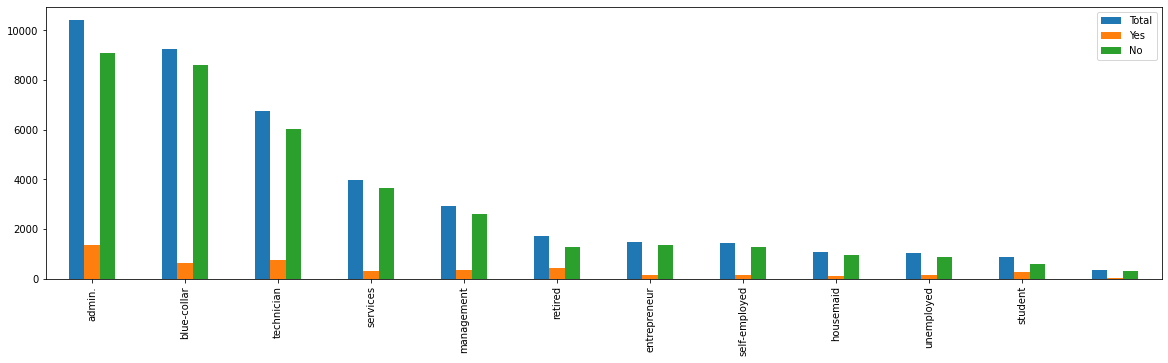

In [ ]:
labels = df_jobs['Job Title']
df_jobs.plot.bar(stacked=False,figsize=(20,5))
positions= np.arange(11)
plt.xticks(positions,labels)
plt.show()

In [ ]:
df['job'].shape

(41188,)

In [ ]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [ ]:
# mar = df[df['marital']=='married']
# sig = df[df['marital']=='single']
# div = df[df['marital']=='divorced']
# div = df[df['marital']=='unknown']

married = df['marital'].value_counts().to_frame()
married

,marital
married,24928
single,11568
divorced,4612
unknown,80


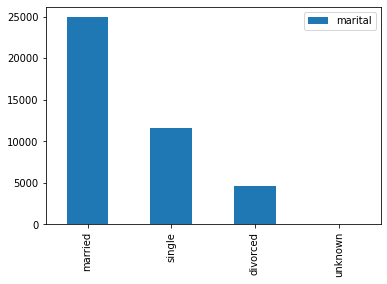

In [ ]:
married.plot.bar(stacked=True)


In [ ]:
c_job = df['job'].value_counts().to_frame()

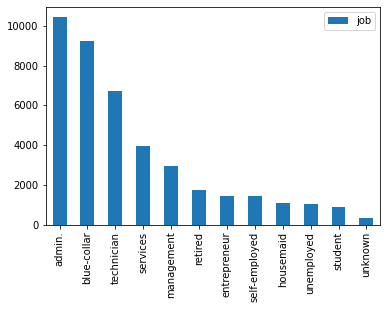

In [ ]:
c_job.plot.bar()

Categorical Variable Encoding

In [ ]:
cat

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri,success
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,high.school,unknown,no,yes,telephone,jun,thu,nonexistent
41184,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,nonexistent
41185,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,nonexistent
41186,technician,married,professional.course,no,no,yes,telephone,oct,tue,nonexistent


In [ ]:
df = df.drop(['default','housing','contact','month','day_of_week'],axis=1)

# Encoding Data

In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['education']=LE.fit_transform(df['education'])
df['job']=LE.fit_transform(df['job'])

In [ ]:
encode_data = pd.get_dummies(df, columns=['marital','loan','poutcome'])

In [ ]:
encode_data.head()

,age,job,education,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,...,marital_divorced,marital_married,marital_single,marital_unknown,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,1,0,210,1,999.0,0,1.4,93.444,-36.1,...,0,1,0,0,1,0,0,0,1,0
1,53,9,7,138,1,999.0,0,-0.1,93.200,-42.0,...,0,1,0,0,1,0,0,0,1,0
2,28,4,6,339,3,6.0,2,-1.7,94.055,-39.8,...,0,0,1,0,1,0,0,0,0,1
3,39,7,3,185,2,999.0,0,-1.8,93.075,-47.1,...,0,1,0,0,1,0,0,0,1,0
4,55,5,0,137,1,3.0,1,-2.9,92.201,-31.4,...,0,1,0,0,1,0,0,0,0,1


In [ ]:
encode_data.drop(['marital_unknown','loan_unknown','poutcome_nonexistent'],axis=1,inplace=True)

# Spliting Data

In [ ]:
x = encode_data.drop(['y'],axis=1)
y = encode_data['y']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7327
           1       0.66      0.37      0.47       911

    accuracy                           0.91      8238
   macro avg       0.79      0.67      0.71      8238
weighted avg       0.90      0.91      0.90      8238



# Model Evaluation

In [ ]:
encode_data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


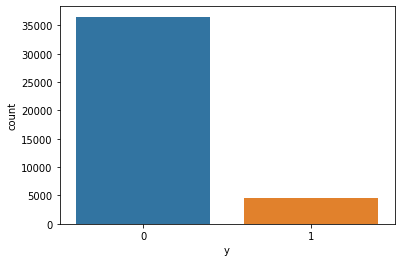

In [ ]:
sns.countplot(encode_data['y'])

# Balancing Data

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x,y = smote.fit_resample(x,y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


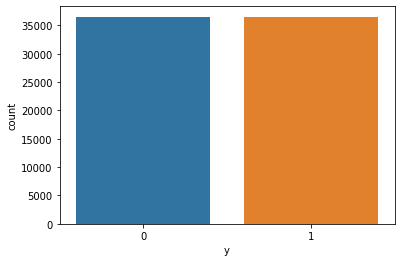

In [ ]:
sns.countplot(y)

# RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dt = DecisionTreeClassifier()
rfe = RFE(dt,n_features_to_select=19)
rfe.fit(x,y)
rfe.support_

for feature in rfe.support_.nonzero():
  print(x.columns[feature])

Index(['age', 'job', 'education', 'duration', 'campaign', 'pdays', 'previous',
       'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
       'nr_employed', 'marital_divorced', 'marital_married', 'marital_single',
       'loan_no', 'loan_yes', 'poutcome_failure', 'poutcome_success'],
      dtype='object')


In [ ]:
new_view = pd.DataFrame({'Features':list(x.columns),'Ranking':rfe.ranking_})
new_view = new_view.sort_values(by='Ranking')
new_view

,Features,Ranking
0,age,1
16,loan_yes,1
15,loan_no,1
14,marital_single,1
13,marital_married,1
12,marital_divorced,1
11,nr_employed,1
10,euribor3m,1
17,poutcome_failure,1
9,cons_conf_idx,1


# Re-Train Our Model


In [ ]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.20)

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
pred = model.predict(x_test)

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7330
           1       0.85      0.87      0.86      7290

    accuracy                           0.86     14620
   macro avg       0.86      0.86      0.86     14620
weighted avg       0.86      0.86      0.86     14620



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


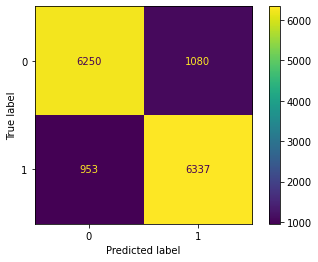

In [ ]:


from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm= confusion_matrix(y_test,pred)
plot_confusion_matrix(model,x_test,y_test)